In [10]:
include("../src/utilities.jl")
include("../src/crustDistribution.jl")
using StatGeochem
using Plots; gr();
using Statistics
using StatsBase

Loading crust information from file ../data/crustDistribution.jld


In [4]:
lats = crustDistribution.all_lats
longs = crustDistribution.all_longs
seismic = fill(NaN, (length(lats), 9)) # rows vp, vs, rho for upper, middle, lower
for layer in 6:8
    s = find_crust1_seismic(lats, longs, layer) # vp, vs, rho 
    for i in 1:3
        seismic[:,(layer-6)*3+i] .= s[i]
    end
end


In [5]:
g = globe(lats, longs, seismic[:,1]); # first layer vp

In [6]:
heatmap(g, colorbar_title="Vp", size=(500,300),xticks=linspace(0,360,9), framestyle=:box, color=cgrad(:haline))#, yticks=false, xticks=false, tickfontsize=10)# yaxis=false, xaxis=false, yticks=false, xticks=false, tickfontsize=10)
savefig("crust1.pdf")

# Number of unique crust types

In [7]:
println(size(unique(seismic, dims=1))) # for all crust 
println(size(unique(seismic[:,1:3], dims=1))) # for just upper crust 

(24, 9)
(17, 3)


# Uncertainty estimation 

In [12]:
with_std = seismic[:,1] .+ randn(size(seismic,1)) .* std(seismic[:,1]); 

In [54]:
histogram(seismic[:,1], normalize=:pdf, alpha=.6, linewidth=0, label="Original")
for i in [1,2.5,10]
    with_std = seismic[:,1] .+ randn(size(seismic,1)) .* (i/10)*std(seismic[:,1]); 
    stephist!(with_std, normalize=:pdf, label="Error = $(i/10) x σ", linewidth=2)
end

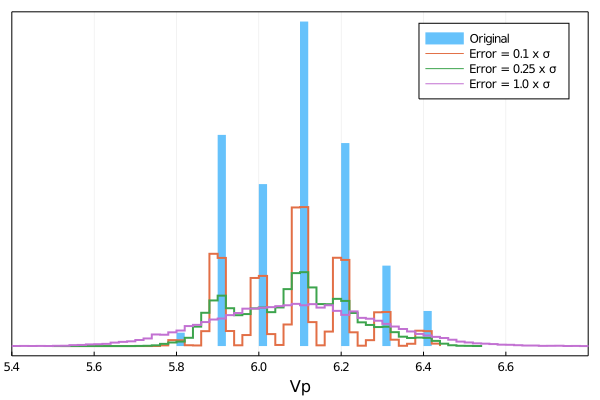

In [58]:
plot!(xlabel="Vp", yticks=false, xlims=(5.4,6.8), framestyle=:box)
#savefig("viz/crust1_uncertainty.png")